In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('data/creditcard.csv')

# Analysis

In [4]:
df.sample(5, random_state=0)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,0


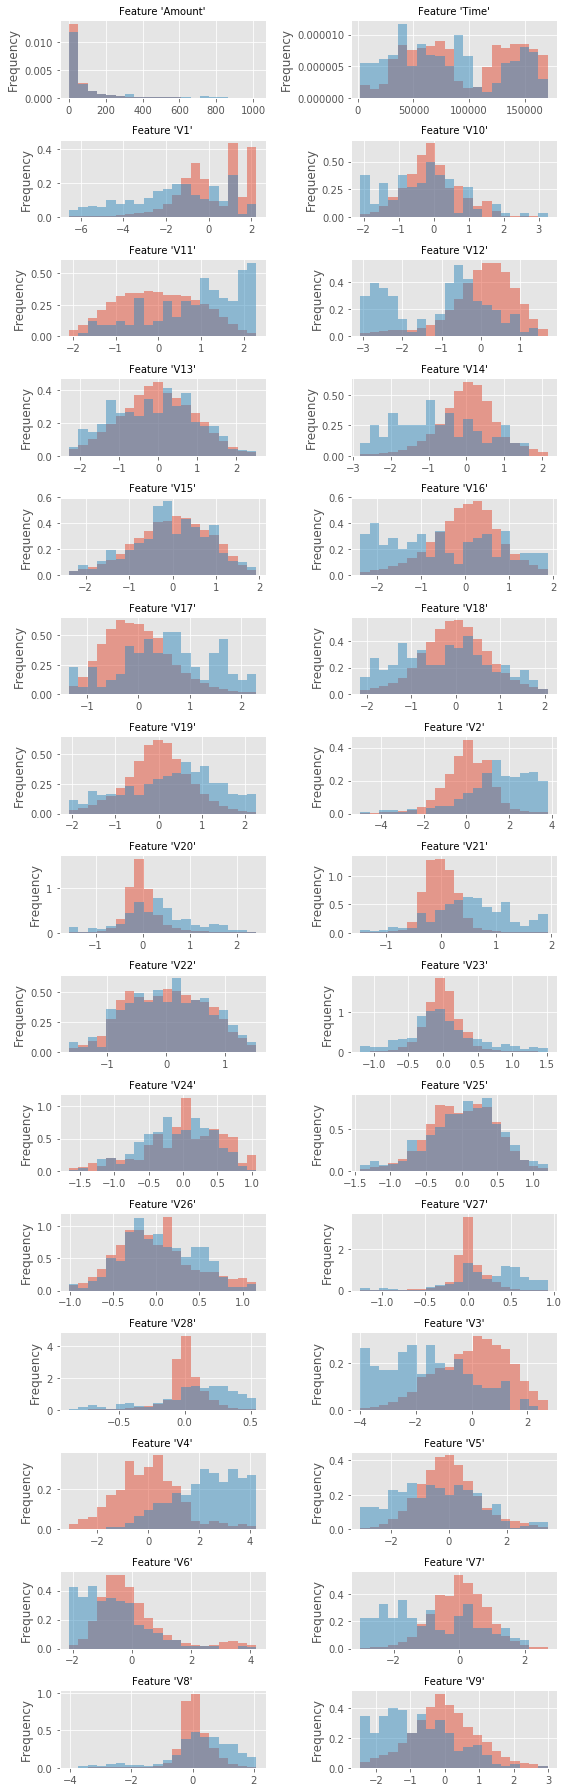

In [18]:
# Plotting the histogram of every feature per class (0 = no fraud, 1 = fraud)
columns = sorted(df.drop(['Class'], axis=1).columns)
width = 2 # int(np.sqrt(len(columns)))
height = np.ceil(len(columns) / width)
with plt.rc_context(rc={'figure.figsize': (10, 25)}):
    fig = plt.figure()
    for col_i, col in enumerate(columns):
        fig.add_subplot(height, width, col_i + 1)
        value_range = (df[col].quantile(.01), df[col].quantile(.99))
        df.groupby('Class')[col].plot.hist(alpha=0.5, normed=True, bins=20, range=value_range)
        plt.title("Feature '{}'".format(col), fontdict=dict(fontsize=10))
plt.tight_layout()

# Fraud detection

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

strat_kfold = StratifiedKFold(n_splits=3, shuffle=True)
v = strat_kfold.split(df.drop('Class', axis=1), df.Class)

model = RandomForestClassifier(n_estimators=15, max_depth=3, class_weight='balanced')

for i, (train_idx, test_idx) in enumerate(strat_kfold.split(df, df.Class)):
    print("Fold #{}".format(i))
    train_df, test_df = df.loc[train_idx], df.loc[test_idx]
    model.fit(train_df.drop('Class', axis=1), train_df.Class)
    predictions = model.predict(test_df.drop('Class', axis=1))
    conf = confusion_matrix(test_df.Class, predictions)
    print(conf)

Fold 0
[[94592   180]
 [   27   137]]
Fold 1
[[94380   392]
 [   24   140]]
Fold 2
[[94230   541]
 [   18   146]]
